In [1]:
import hashlib
import time
import random
import json
import matplotlib
import matplotlib.pyplot as plt

In [2]:
class Transaction:
    def __init__(self, sender, recipient, amount):
        self.sender = sender
        self.recipient = recipient
        self.amount = amount
    
    def to_dict(self):
        return {
            'sender': self.sender,
            'recipient': self.recipient,
            'amount': self.amount,
        }

        
class Block:
    def __init__(self, index, previous_hash, transactions, timestamp, proof):
        self.index = index
        self.previous_hash = previous_hash
        self.transactions = transactions
        self.timestamp = timestamp
        self.proof = proof

    def calculate_hash(self):
        return hashlib.sha256(f"{self.index}{self.previous_hash}{self.transactions}{self.timestamp}{self.proof}".encode()).hexdigest()


In [3]:

class Blockchain:
    def __init__(self):
        self.chain = []
        self.current_transactions = []
        self.create_genesis_block()

    def create_genesis_block(self):
        self.create_block(proof=0, previous_hash="0")

    def create_block(self, proof, previous_hash):
        block = Block(
            index=len(self.chain) + 1,
            previous_hash=previous_hash or self.hash(self.chain[-1]),
            transactions=self.current_transactions,
            timestamp=time.time(),
            proof=proof,
        )
        self.current_transactions = []
        self.chain.append(block)
        return block

    def add_transaction(self, sender, recipient, amount):
        self.current_transactions.append(Transaction(sender, recipient, amount))

    @staticmethod
    def hash(block):
        return block.calculate_hash()

    def last_block(self):
        return self.chain[-1] if self.chain else None


In [4]:
class PoWConsensus:
    @staticmethod
    def proof_of_work(last_proof):
        proof = 0
        while PoWConsensus.validate_proof(last_proof, proof) is False:
            proof += 1
        return proof

    @staticmethod
    def validate_proof(last_proof, proof):
        guess = f"{last_proof}{proof}".encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"


In [5]:
class PoSConsensus:
    def __init__(self):
        self.validators = []
        self.chain = []
        self.current_transactions = []
        self.create_genesis_block()

    def create_genesis_block(self):
        self.create_block(proof=0, previous_hash="0")

    def create_block(self, proof, previous_hash):
        block = Block(
            index=len(self.chain) + 1,
            previous_hash=previous_hash or self.hash(self.chain[-1]),
            transactions=self.current_transactions,
            timestamp=time.time(),
            proof=proof,
        )
        self.current_transactions = []
        self.chain.append(block)
        return block

    def add_transaction(self, sender, recipient, amount):
        self.current_transactions.append(Transaction(sender, recipient, amount))

    def add_validator(self, validator):
        self.validators.append(validator)

    def select_validator(self):
        return random.choice(self.validators)

    def proof_of_stake(self, last_block):
        validator = self.select_validator()
        proof = 0
        while self.validate_proof(last_block.proof, proof, validator) is False:
            proof += 1
        return proof

    @staticmethod
    def validate_proof(last_proof, proof, validator):
        guess = f"{last_proof}{proof}{validator}".encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

    def last_block(self):
        return self.chain[-1] if self.chain else None

    def get_previous_hash(self, last_block):
        return self.hash(last_block)

    @staticmethod
    def hash(block):
        block_string = json.dumps(block.__dict__, sort_keys=True, default=lambda x: x.to_dict())
        return hashlib.sha256(block_string.encode()).hexdigest()

In [6]:
# uPDATED
class DPoSConsensus:
    def __init__(self):
        self.delegates = []
        self.chain = []
        self.current_transactions = []
        self.votes = {}  # Dictionary to store votes
        self.create_genesis_block()

    def create_genesis_block(self):
        self.create_block(proof=0, previous_hash="0")

    def create_block(self, proof, previous_hash):
        block = Block(
            index=len(self.chain) + 1,
            previous_hash=previous_hash or self.hash(self.chain[-1]),
            transactions=self.current_transactions,
            timestamp=time.time(),
            proof=proof,
        )
        self.current_transactions = []
        self.chain.append(block)
        return block

    def add_transaction(self, sender, recipient, amount):
        self.current_transactions.append(Transaction(sender, recipient, amount))

    def add_delegate(self, delegate):
        self.delegates.append(delegate)
        self.votes[delegate] = []  # Initialize votes for the new delegate

    def select_delegate(self):
        return random.choice(self.delegates)

    def delegated_proof_of_stake(self, last_block):
        delegate = self.select_delegate()
        proof = 0
        while self.validate_proof(last_block.proof, proof, delegate) is False:
            proof += 1
        return proof

    @staticmethod
    def validate_proof(last_proof, proof, delegate):
        guess = f"{last_proof}{proof}{delegate}".encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

    def last_block(self):
        return self.chain[-1] if self.chain else None

    def get_previous_hash(self, last_block):
        return self.hash(last_block)

    @staticmethod
    def hash(block):
        block_string = json.dumps(block.__dict__, sort_keys=True, default=lambda x: x.to_dict())
        return hashlib.sha256(block_string.encode()).hexdigest()

    def vote(self, delegate, voter):
        if delegate in self.delegates and voter in self.delegates:
            self.votes[delegate].append(voter)

    def get_vote_count(self, delegate):
        return len(self.votes.get(delegate, []))


In [7]:
def simulate_pow_throughputs():
    blockchain_pow = Blockchain()
    num_transactions_pow = [100, 500, 1000, 1500, 2000]
    throughputs_pow = {}

    for num_tx in num_transactions_pow:
        start_time = time.time()
        for _ in range(num_tx):
            blockchain_pow.add_transaction("Arafat", "Chopra", 1)
        last_block_pow = blockchain_pow.last_block()
        last_proof_pow = last_block_pow.proof
        proof_pow = PoWConsensus.proof_of_work(last_proof_pow)
        blockchain_pow.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_pow = blockchain_pow.hash(last_block_pow)
        blockchain_pow.create_block(proof_pow, previous_hash_pow)
        end_time = time.time()
        throughput_pow = num_tx / (end_time - start_time)
        throughputs_pow[num_tx] = throughput_pow

    visualize_pow_throughput(throughputs_pow)
    

In [8]:
def simulate_pos_throughputs():
    blockchain_pos = PoSConsensus()
    validator_addresses = ["Validator1", "Validator2", "Validator3"]
    for address in validator_addresses:
        blockchain_pos.add_validator(address)

    
    # Simulation for PoS
    num_transactions_pos = [100, 500, 1000, 1500, 2000]
    throughputs_pos = {}
    pos_latencies = {}


    for num_tx in num_transactions_pos:
        start_time = time.time()
        for _ in range(num_tx):
            blockchain_pos.add_transaction("Arafat", "Chopra", 1)
        last_block_pos = blockchain_pos.last_block()
        proof_pos = blockchain_pos.proof_of_stake(last_block_pos)
        blockchain_pos.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        
        previous_hash_pos = blockchain_pos.get_previous_hash(last_block_pos)
        blockchain_pos.create_block(proof_pos, previous_hash_pos)
        end_time = time.time()
        pos_latencies[num_tx] = (end_time - start_time) / num_tx
        
        # Calculate throughput
        time_taken = end_time - start_time
        throughput_pos = num_tx / time_taken
        throughputs_pos[num_tx] = throughput_pos

        # Calculate and store latency
        pos_latencies[num_tx] = time_taken / num_tx


    visualize_pos_throughput(throughputs_pos)


In [9]:
def simulate_dpos_throughputs():
    blockchain_dpos = DPoSConsensus()
    delegate_addresses = ["Delegate1", "Delegate2", "Delegate3"]  
    for address in delegate_addresses:
        blockchain_dpos.add_delegate(address)

    num_transactions_dpos = [100, 500, 1000, 1500, 2000]
    throughputs_dpos = {}

    for num_tx in num_transactions_dpos:
        start_time = time.time()
        for _ in range(num_tx):
            blockchain_dpos.add_transaction("Arafat", "Chopra", 1)
        last_block_dpos = blockchain_dpos.last_block()
        proof_dpos = blockchain_dpos.delegated_proof_of_stake(last_block_dpos)
        blockchain_dpos.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_dpos = blockchain_dpos.get_previous_hash(last_block_dpos)
        blockchain_dpos.create_block(proof_dpos, previous_hash_dpos)
        end_time = time.time()
        
        time_taken = end_time - start_time
        throughput_dpos = num_tx / time_taken
        throughputs_dpos[num_tx] = throughput_dpos

    visualize_dpos_throughput(throughputs_dpos)


In [10]:
def simulate_latency_impact():
    num_transactions = [100, 500, 1000, 1500, 2000]
    pow_latencies = {}
    pos_latencies = {}
    dpos_latencies = {}

    for num_tx in num_transactions:
        # PoW simulation
        blockchain_pow = Blockchain()
        start_time = time.time()
        for _ in range(num_tx):
            blockchain_pow.add_transaction("Aarafat", "Chopra", 1)
        last_block_pow = blockchain_pow.last_block()
        last_proof_pow = last_block_pow.proof
        proof_pow = PoWConsensus.proof_of_work(last_proof_pow)
        blockchain_pow.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_pow = blockchain_pow.hash(last_block_pow)
        blockchain_pow.create_block(proof_pow, previous_hash_pow)
        end_time = time.time()
        pow_latencies[num_tx] = (end_time - start_time) / num_tx

        # PoS simulation
        blockchain_pos = PoSConsensus()
        validator_addresses = ["Validator1", "Validator2", "Validator3"] 
        for address in validator_addresses:
            blockchain_pos.add_validator(address)

        start_time = time.time()
        for _ in range(num_tx):
            blockchain_pos.add_transaction("Aarafat", "Chopra", 1)
        last_block_pos = blockchain_pos.last_block()
        proof_pos = blockchain_pos.proof_of_stake(last_block_pos)
        blockchain_pos.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_pos = blockchain_pos.get_previous_hash(last_block_pos)
        blockchain_pos.create_block(proof_pos, previous_hash_pos)
        end_time = time.time()
        pos_latencies[num_tx] = (end_time - start_time) / num_tx
        
        
        
        # DPoS simulation
        blockchain_dpos = DPoSConsensus()
        delegate_addresses = ["Delegate1", "Delegate2", "Delegate3"]
        for address in delegate_addresses:
            blockchain_dpos.add_delegate(address)

        start_time = time.time()
        for _ in range(num_tx):
            blockchain_dpos.add_transaction("Aarafat", "Chopra", 1)
        last_block_dpos = blockchain_dpos.last_block()
        proof_dpos = blockchain_dpos.delegated_proof_of_stake(last_block_dpos)
        blockchain_dpos.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_dpos = blockchain_dpos.get_previous_hash(last_block_dpos)
        blockchain_dpos.create_block(proof_dpos, previous_hash_dpos)
        end_time = time.time()
        dpos_latencies[num_tx] = (end_time - start_time) / num_tx
        
    # Visualize the impact of different numbers of transactions on latency for PoW and PoS
    visualize_PoW_latency_impact(pow_latencies)
    visualize_PoS_latency_impact(pos_latencies)
    visualize_dpos_latency_impact(dpos_latencies)
    visualize_latency_comparison(pow_latencies, pos_latencies,dpos_latencies)


In [11]:
'''
Simulate latency for different transection.
using a fixed number of transactions (1000 in this) to calculate the latency for each case.
'''

def simulate_latency_with_nodes_pow(num_nodes):
    # Simulate PoW latency with varying numbers of nodes
    latencies = {}
    for num_n in num_nodes:
        blockchain_nodes = Blockchain()
        start_time = time.time()
        for _ in range(1000):  # Simulate with a fixed number of transactions
            blockchain_nodes.add_transaction("Arafat", "Chopra", 1)
        last_block_nodes = blockchain_nodes.last_block()
        last_proof_nodes = last_block_nodes.proof
        proof_nodes = PoWConsensus.proof_of_work(last_proof_nodes)
        blockchain_nodes.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_nodes = blockchain_nodes.hash(last_block_nodes)
        blockchain_nodes.create_block(proof_nodes, previous_hash_nodes)
        end_time = time.time()
        latencies[num_n] = (end_time - start_time) / 1000  # Average latency over 1000 transactions
    return latencies

def simulate_latency_with_nodes_pos(num_nodes):
    # Simulate PoS latency with varying numbers of nodes
    latencies = {}
    for num_n in num_nodes:
        blockchain_nodes = PoSConsensus()
        validator_addresses = ["Validator1", "Validator2", "Validator3"]
        for address in validator_addresses:
            blockchain_nodes.add_validator(address)
        start_time = time.time()
        for _ in range(1000):  # Simulate with a fixed number of transactions
            blockchain_nodes.add_transaction("Arafat", "Chopra", 1)
        last_block_nodes = blockchain_nodes.last_block()
        proof_nodes = blockchain_nodes.proof_of_stake(last_block_nodes)
        blockchain_nodes.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_nodes = blockchain_nodes.get_previous_hash(last_block_nodes)
        blockchain_nodes.create_block(proof_nodes, previous_hash_nodes)
        end_time = time.time()
        latencies[num_n] = (end_time - start_time) / 1000  # Average latency over 1000 transactions
    return latencies


def simulate_latency_with_nodes_dpos(num_nodes):
    # Simulate DPoS latency with varying numbers of nodes
    latencies = {}
    for num_n in num_nodes:
        blockchain_nodes = DPoSConsensus()
        delegate_addresses = ["Delegate1", "Delegate2", "Delegate3"]
        for address in delegate_addresses:
            blockchain_nodes.add_delegate(address)
        start_time = time.time()
        for _ in range(1000):  # Simulate with a fixed number of transactions
            blockchain_nodes.add_transaction("Arafat", "Chopra", 1)
        last_block_nodes = blockchain_nodes.last_block()
        proof_nodes = blockchain_nodes.delegated_proof_of_stake(last_block_nodes)
        blockchain_nodes.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_nodes = blockchain_nodes.get_previous_hash(last_block_nodes)
        blockchain_nodes.create_block(proof_nodes, previous_hash_nodes)
        end_time = time.time()
        latencies[num_n] = (end_time - start_time) / 1000  # Average latency over 1000 transactions
    return latencies

In [12]:
# Visualization functions for PoW and PoS

def visualize_pow_throughput(throughputs):
    plt.plot(throughputs.keys(), throughputs.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Throughput (Transactions per Second)')
    plt.title('Average Throughput with Varying Numbers of Transactions (Proof of Work)')
    plt.grid(True)
    plt.show()

def visualize_pos_throughput(throughputs):
    plt.plot(throughputs.keys(), throughputs.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Throughput (Transactions per Second)')
    plt.title('Average Throughput with Varying Numbers of Transactions (Proof of Stake)')
    plt.grid(True)
    plt.show()
    
def visualize_dpos_throughput(throughputs_dpos):
    plt.plot(throughputs_dpos.keys(), throughputs_dpos.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Throughput (Transactions per Second)')
    plt.title('Average Throughput with Varying Numbers of Transactions (DPoS)')
    plt.grid(True)
    plt.show()

def visualize_PoW_latency_impact(latencies):
    plt.plot(latencies.keys(), latencies.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Latency (Seconds)')
    plt.title('Impact of Different Numbers of Transactions on Latency (PoW)')
    plt.grid(True)
    plt.show()
    
def visualize_PoS_latency_impact(latencies):
    plt.plot(latencies.keys(), latencies.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Latency (Seconds)')
    plt.title('Impact of Different Numbers of Transactions on Latency (PoS)')
    plt.grid(True)
    plt.show()

    
def visualize_dpos_latency_impact(latencies):
    plt.plot(latencies.keys(), latencies.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Latency (Seconds)')
    plt.title('Impact of Different Numbers of Transactions on Latency (DPoS)')
    plt.grid(True)
    plt.show()


In [13]:
def visualize_latency_comparison(pow_latencies, pos_latencies, dpos_latencies):
    num_transactions = list(pow_latencies.keys())
    pow_latency_values = list(pow_latencies.values())
    pos_latency_values = list(pos_latencies.values())
    dpos_latency_values = list(dpos_latencies.values())

    width = 100
    fig, ax = plt.subplots()
    bar1 = ax.bar([num - width for num in num_transactions], pow_latency_values, width,
                  label='PoW Latency', color='skyblue', edgecolor='none', linewidth=2)
    bar2 = ax.bar(num_transactions, pos_latency_values, width,
                  label='PoS Latency', color='lightcoral', edgecolor='none', linewidth=2)
    bar3 = ax.bar([num + width for num in num_transactions], dpos_latency_values, width,
                  label='DPoS Latency', color='lightgreen', edgecolor='none', linewidth=2)

    ax.set_xlabel('Number of Transactions')
    ax.set_ylabel('Average Latency (Seconds)')
    ax.set_title('Comparison of Average Latency (PoW vs. PoS vs. DPoS)')
    ax.set_xticks(num_transactions)
    ax.legend()
    ax.grid(True)

    plt.show()


In [14]:
"""
Visualization of PoW and PoS latency for different number of nodes. 
"""
def visualize_latency_with_nodes(pow_latencies, pos_latencies, dpos_latencies):
    num_nodes_pow = list(pow_latencies.keys())
    pow_latency_values = [pow_latencies[num_n] for num_n in num_nodes_pow]
    num_nodes_pos = list(pos_latencies.keys())
    pos_latency_values = [pos_latencies[num_n] for num_n in num_nodes_pos]
    num_nodes_dpos = list(dpos_latencies.keys())
    dpos_latency_values = [dpos_latencies[num_n] for num_n in num_nodes_dpos]

    width = 1.3
    fig, ax = plt.subplots()
    bar1 = ax.bar([num - width for num in num_nodes_pow], pow_latency_values, width,
                  label='PoW Latency', color='royalblue', edgecolor='none', linewidth=0.1)
    bar2 = ax.bar(num_nodes_pos, pos_latency_values, width,
                  label='PoS Latency', color='orange', edgecolor='none', linewidth=0.1)
    bar3 = ax.bar([num + width for num in num_nodes_dpos], dpos_latency_values, width,
                  label='DPoS Latency', color='green', edgecolor='none', linewidth=0.1)

    ax.set_xlabel('Number of Nodes')
    ax.set_ylabel('Average Latency (Seconds)')
    ax.set_title('Average Latency with Varying Numbers of Nodes')
    ax.set_xticks(num_nodes_pow + num_nodes_pos + num_nodes_dpos)
    ax.legend()
    ax.grid(True)

    plt.show()


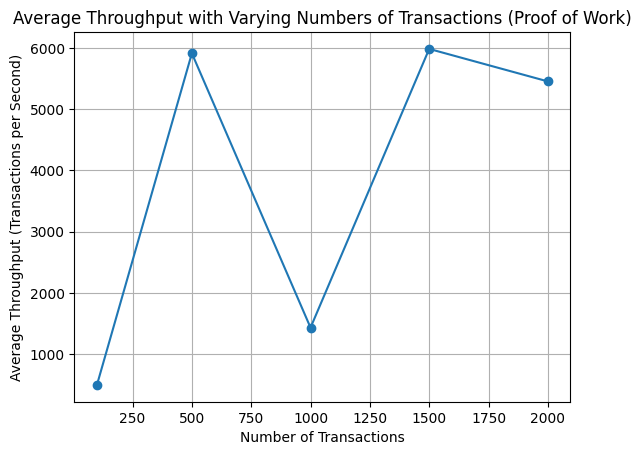

In [15]:
simulate_pow_throughputs()

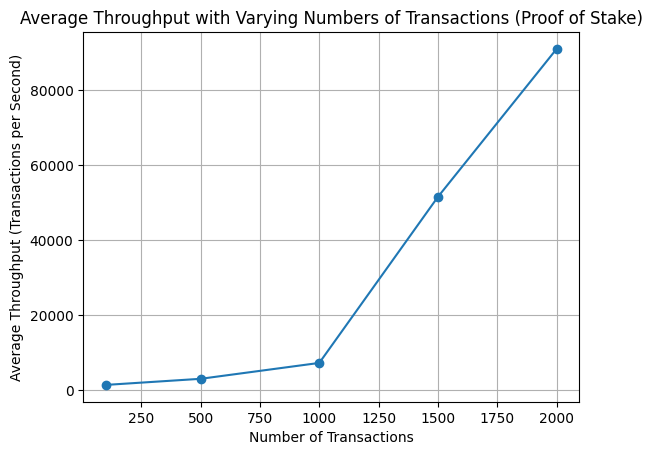

In [16]:
simulate_pos_throughputs()

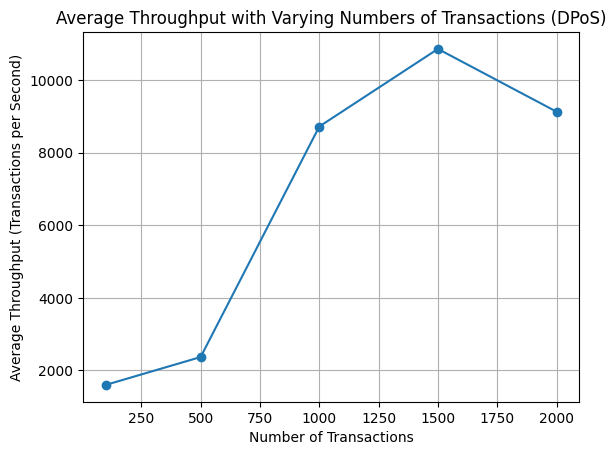

In [17]:
# Call the simulation function
simulate_dpos_throughputs()

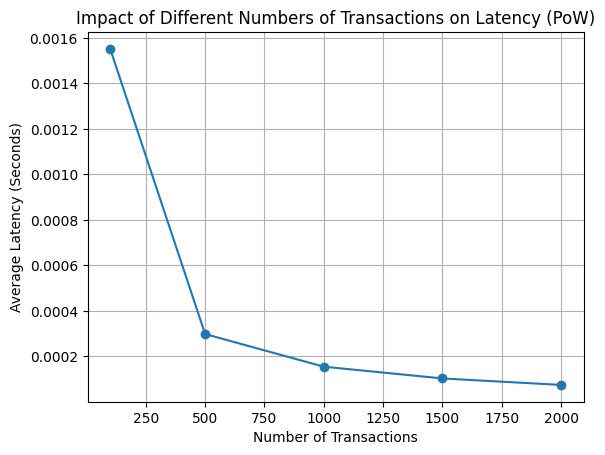

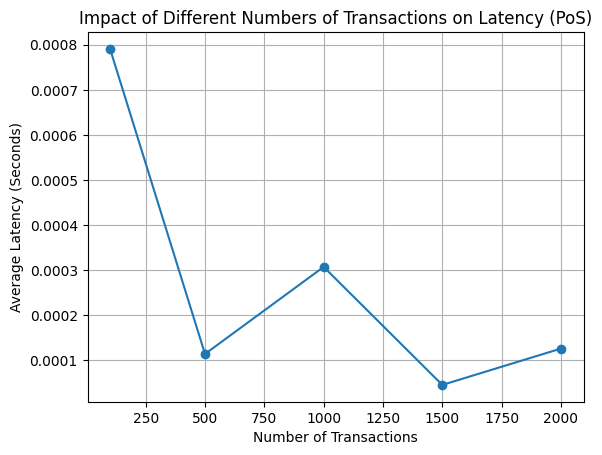

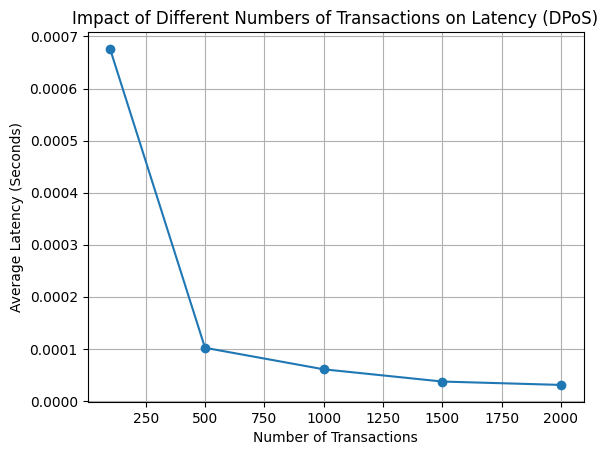

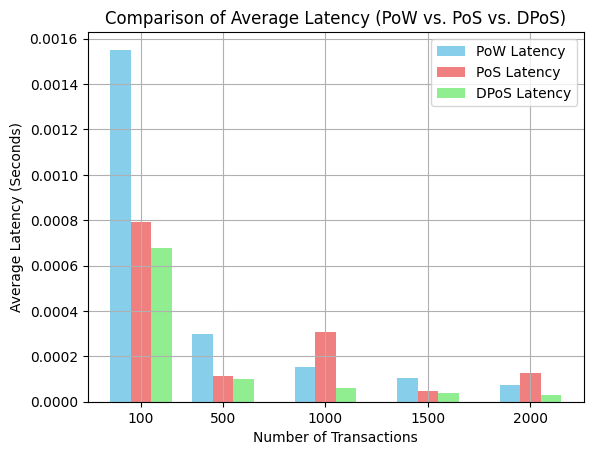

In [18]:
simulate_latency_impact()

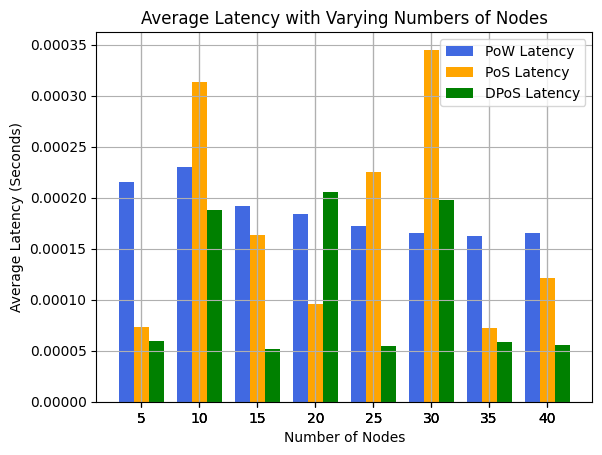

In [19]:
# Average latency with varying numbers of nodes
num_nodes = [5, 10, 15, 20, 25, 30, 35, 40]
# Simulate latency for PoW and PoS with varying numbers of nodes
pow_latencies = simulate_latency_with_nodes_pow(num_nodes)
pos_latencies = simulate_latency_with_nodes_pos(num_nodes)
dpos_latencies = simulate_latency_with_nodes_dpos(num_nodes)
# Visualize the data
visualize_latency_with_nodes(pow_latencies, pos_latencies,dpos_latencies)

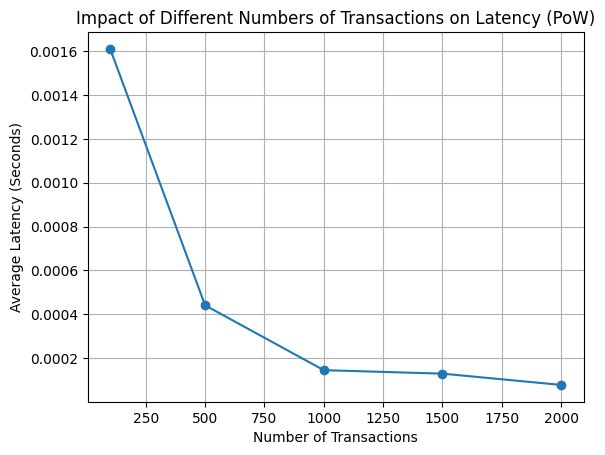

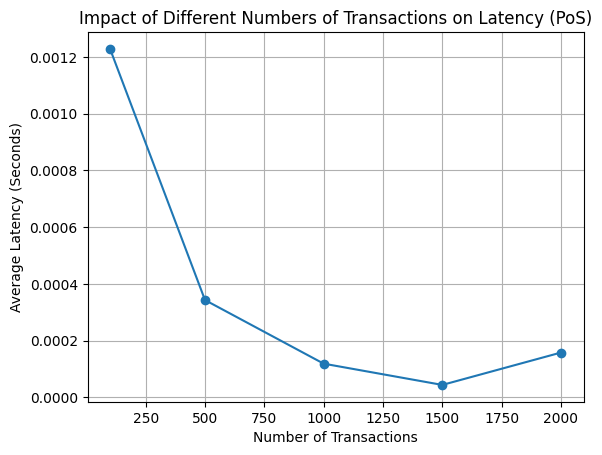

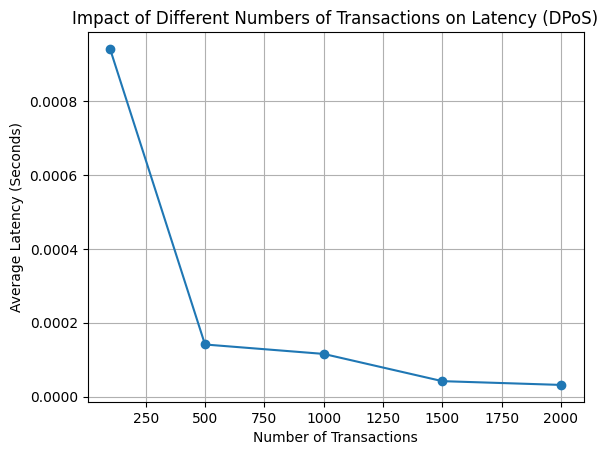

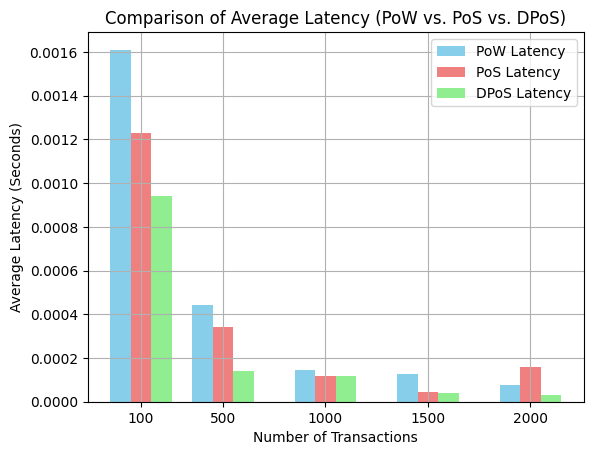

In [20]:
simulate_latency_impact()

In [41]:
import random
import time
from collections import defaultdict

class RaftNode:
    def __init__(self, node_id, total_nodes):
        self.node_id = node_id
        self.total_nodes = total_nodes
        self.current_term = 0
        self.voted_for = None
        self.log = []
        self.commit_index = 0
        self.last_applied = 0
        self.state = "follower"
        self.leader_id = None
        self.timeout = random.randint(150, 300) / 1000.0  # Simulated election timeout
        self.votes_received = defaultdict(lambda: False)
        self.last_heartbeat = time.time()  # Initialize last heartbeat time

    def become_follower(self, term, leader_id):
        self.state = "follower"
        self.current_term = term
        self.voted_for = None
        self.leader_id = leader_id

    def become_candidate(self):
        self.state = "candidate"
        self.current_term += 1
        self.voted_for = self.node_id
        self.votes_received = defaultdict(lambda: False)
   

    def become_leader(self):
        self.state = "leader"
        self.leader_id = self.node_id

    def request_vote(self, term, candidate_id, last_log_index, last_log_term):
        if term < self.current_term:
            return False

        if term > self.current_term:
            self.become_follower(term, None)

        if self.voted_for is None or self.voted_for == candidate_id:
            # Check if candidate's log is at least as up-to-date as our log
            if last_log_term > self.log[-1]["term"] or (
                last_log_term == self.log[-1]["term"] and last_log_index >= len(self.log)
            ):
                self.voted_for = candidate_id
                return True

        return False

    def append_entries(self, term, leader_id, prev_log_index, prev_log_term, entries, leader_commit):
        if term < self.current_term:
            return False

        if term >= self.current_term:
            self.become_follower(term, leader_id)

        if prev_log_index >= len(self.log) or self.log[prev_log_index]["term"] != prev_log_term:
            return False

        self.log = self.log[: prev_log_index + 1] + entries
        if leader_commit > self.commit_index:
            self.commit_index = min(leader_commit, len(self.log) - 1)

        return True

    def send_heartbeat(self):
        # Simulate sending a heartbeat to followers
        pass
    # Inside RaftNode class
    def update_election_timeout(self):
        self.timeout = random.randint(150, 300) / 1000.0

    def simulate(self):
        while True:  # Run continuously
            if self.state == "follower":
                if time.time() - self.last_heartbeat > self.timeout:
                    self.update_election_timeout()  # Update election timeout
                    self.become_candidate()
            elif self.state == "candidate":
                if time.time() - self.last_heartbeat > self.timeout:
                    self.update_election_timeout()  # Update election timeout
                    self.become_candidate()

                    # Request votes from other nodes
                    votes = 1  # Vote for self
                    for node_id in range(self.total_nodes):
                        if node_id != self.node_id:
                            if self.request_vote(self.current_term, node_id, len(self.log) - 1, self.log[-1]["term"]):
                                votes += 1
                                if votes > self.total_nodes / 2:
                                    self.become_leader()
                                    break
            elif self.state == "leader":
                if time.time() - self.last_heartbeat > 0.1:
                    self.send_heartbeats()  # Send heartbeats to followers
                    self.last_heartbeat = time.time()  # Update last heartbeat time
                    self.update_commit_index()  # Update commit index
            time.sleep(0.1)  # Sleep to avoid busy-waiting

def find_initial_leader(nodes):
    # Find an initial leader node
    for node in nodes:
        if node.state == "leader":
            return node
    return None

In [ ]:

def simulate_raft_throughputs(num_nodes, num_transactions_list, initial_leader_node_id, max_duration_seconds):
    # Create Raft nodes
    nodes = [RaftNode(node_id, num_nodes) for node_id in range(num_nodes)]

    throughputs = {}

    start_time = time.time()
    while time.time() - start_time < max_duration_seconds:
        for num_tx in num_transactions_list:
            # Simulate adding transactions
            for _ in range(num_tx):
                # Select a random node as the leader to propose the transaction
                leader_node = random.choice(nodes)
                while leader_node.state != "leader":
                    leader_node = random.choice(nodes)

                # In a real Raft implementation, you would send the transaction proposal to other nodes
                # and have them acknowledge it. For simplicity, we'll just increment the commit_index here.
                leader_node.commit_index += 1

            end_time = time.time()
            time_taken = end_time - start_time

            # Calculate throughput only if time_taken is greater than zero
            if time_taken > 0:
                throughput = num_tx / time_taken
                throughputs[num_tx] = throughput

    return throughputs

num_nodes = 5
num_transactions_list = [1, 5, 1, 1, 2]  # Reduced number of transactions
initial_leader_node_id = 0  # Manually specify the initial leader node ID
max_duration_seconds = 60  # Specify the maximum duration of the simulation in seconds
throughputs = simulate_raft_throughputs(num_nodes, num_transactions_list, initial_leader_node_id, max_duration_seconds)
print(throughputs)
